**Question**: Is calcium indicator signal of a single neuron equal to its low-pass-filtered spike rate + noise?

**Part 2. Signal transmission**

Problem with the first part was that the PCA was able to pick up disjoint nature of samples, where the rate did not vary within an individual sample. Lets try something more sophisticated here:
* The spike generator will receive two independent random variables - rate change over time and inter-spike-interval variance change over time. Both will have fast and slow time scale variations
* Each trial is going to be longer - say 10s, and will be generated based on above rates, unique rate for each trial
* We will test how well the resulting signal predicts the generator rates in presence of retardation convolution and noise

**TODO**:
* In generated signal, parameters are complex magnitudes, that is, prefactors for sine and cosine. The ratio of those effectively defines the phase, as function of frequency. Are there constraints on the phase, such as continuity or smoothness?
* Use gaussian in frequency or log-frequency space

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from signal_processing import signalGen

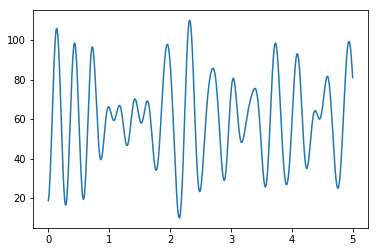

In [119]:
# Box signal values into given interval
def boxData(data, rng):
    data -= np.min(data)
    data /= np.max(data)
    return rng[0] + data * rng[1]

# Step 1: Generate signal with narrow frequency band, predefined maximum and minimum
SAMPLING_RATE = 1000  # Hz
TIME = 5 # s
FREQ_RANGE = [1, 5] #Hz
FREQ_STEP = 0.01 #Hz
SPIKE_RATE_RANGE = [10, 100] # Hz

t_trial, spike_rate = signalGen.wavePacket(SAMPLING_RATE, TIME, FREQ_RANGE, FREQ_STEP)
spike_rate = boxData(spike_rate, SPIKE_RATE_RANGE)

plt.figure()
plt.plot(t_trial, spike_rate)
plt.show()

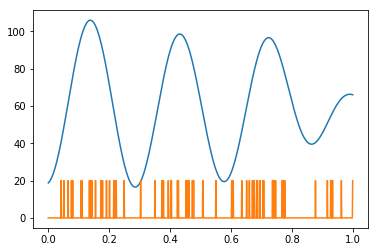

In [120]:
def genSpikesTrial(spike_rate, SAMPLING_RATE):
    return (np.random.uniform(0, 1, len(spike_rate)) - spike_rate/SAMPLING_RATE < 0).astype(int)
    
spikes = genSpikesTrial(spike_rate, SAMPLING_RATE)

plt.figure()
plt.plot(t_trial[:1000], spike_rate[:1000])
plt.plot(t_trial[:1000], 20*spikes[:1000])
plt.show()



# WINDOW_SIZE = 200 #ms
# MIN_SPIKE_INTERVAL = 2 #ms
# MAX_SPIKE_INTERVAL = [10, 60]
# TAUCONV = 400 #ms

# def genSpikes(tauconv = 0):
#     reztmp = np.zeros(4*WINDOW_SIZE)
#     MAX_INTERVAL_EFF = np.random.randint(MAX_SPIKE_INTERVAL[0],MAX_SPIKE_INTERVAL[1])
#     i = np.random.randint(0, MAX_INTERVAL_EFF / 2)
#     while i < 3*WINDOW_SIZE:
#         reztmp[i] = 1
#         i += np.random.randint(MIN_SPIKE_INTERVAL, MAX_INTERVAL_EFF)
    
#     if tauconv > 0:
#         for i in range(1, 4*WINDOW_SIZE):
#             reztmp[i] += reztmp[i-1] * np.exp(-1/tauconv)
    
#     # Sample the spike set using a moving window, skipping the beginning to avoid boundary effects
#     rez = np.zeros((WINDOW_SIZE, WINDOW_SIZE))
#     for i in range(0, WINDOW_SIZE):
#         rez[i] = reztmp[2*WINDOW_SIZE + i: 3 * WINDOW_SIZE + i]
        
#     return rez
    

# N_SAMPLE = 500
# SAMPLES = genSpikes(TAUCONV)
# for i in range(N_SAMPLE-1):
#     SAMPLES = np.vstack((SAMPLES, genSpikes(TAUCONV)))

# print('Total Data', SAMPLES.shape)
    
# plt.figure(figsize=(3,7))
# plt.imshow(SAMPLES[:2*WINDOW_SIZE])
# plt.show()